### 1. <i>Import Packages</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
import pyodbc

### 2. Guidlines to Dealing and Connect to SQL Server DB

<P>Using <b>Pyodbc</b> to connect to a <b>Microsoft sql server</b> database</P>

1- To install it <code>pip install pyodbc</code> <b>OR</b> <code>conda install pyodbc</code>

2- To Read <b>Documentation</b> visit: https://github.com/mkleehammer/pyodbc/wiki

In [3]:
import pyodbc

Find the <b>DRIVERS</b> available

In [4]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'ODBC Driver 18 for SQL Server']

Create a VARIABLE to store the <b>connection string</b>

In [5]:
conn = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-2BVV9CV;DATABASE=ContosoRetailDW;Trusted_Connection=yes;'

Write random <b>Query</b> to select first 10 row from DimProduct table

In [6]:
query = 'select top(10) * from DimProduct'

<b>Create</b> a CONNECTION and <b>import</b> the DATA

In [7]:
## connect and execute and fetch_data
with pyodbc.connect(conn) as conx:  ##open connection and it will close automaticly after exiting with
    cursor = conx.cursor()          ## create a cursor we will use to communicate with database
    cursor.execute(query)           ## Run the query we had written before
    data = cursor.fetchall()        ## Extract all the data

<b>Display</b> first row of data

In [8]:
print(data[:1])

[(1, '0101001', 'Contoso 512MB MP3 Player E51 Silver', '512MB USB driver plays MP3 and WMA', 1, 'Contoso, Ltd', 'Contoso', '1', 'Economy', '1', 'Product0101001', '7', 'Silver', '2.2 x 1.8 x 4 ', ' ', ' ', 4.8, 'ounces', '1', 'inches', '1', 'High', Decimal('6.6200'), Decimal('12.9900'), datetime.datetime(2005, 5, 3, 0, 0), None, 'On', None, None, 1, datetime.datetime(2008, 5, 25, 8, 1, 12), datetime.datetime(2008, 5, 25, 8, 1, 12))]


Extract <b>Column Names</b>

In [9]:
product_columns = [row.column_name for row in cursor.columns(table='DimProduct')]

Convert Query results to <b>DataFrame</b>

<b>WITH PANDAS EVERYTHING IS EASY<b>

EXTRACT data using <b>read_sql</b> in format <b>DataFrame</b>

In [10]:
with pyodbc.connect(conn) as conx:  ##open connection and it will close automaticly after exiting with
    result = pd.read_sql('select BrandName from DimProduct',conx)

result[:1]

,BrandName
0,Contoso


Declare Function for usability purpose

In [11]:
def run_query(query):
    with pyodbc.connect(conn) as conx: 
        result = pd.read_sql(query,conx)
    return result
        

<b>Final Statement To extract Data from the DB in the Future</b>

<code>data = run_query('Write the Query Here....')</code>

### 3. Customer Analysis and Classification

#### 1.<b>import</b> data.

In [12]:
customer_view = run_query('select * from V_Customer ')

In [13]:
customer_view.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption
0,4793,62,M,M,60000.0,1,0,Partial College,1,1,33756.2510
1,4794,57,S,F,70000.0,0,0,Bachelors,0,1,30342.1470
2,4795,57,M,F,80000.0,5,5,Bachelors,0,4,39773.1060
3,4796,57,M,F,80000.0,5,5,Bachelors,1,4,31457.9080
4,4810,62,M,M,70000.0,5,4,Partial College,1,3,31213.5885


#### 2. Exploratory Data Analysis <b>EDA</b>

In [14]:
customer_view.shape

(18484, 11)

<p><b> The Data Contains 18484 Rows and 11 Columns</b></p>

In [15]:
customer_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerKey           18484 non-null  int64  
 1   Age                   18484 non-null  int64  
 2   MaritalStatus         18484 non-null  object 
 3   Gender                18484 non-null  object 
 4   YearlyIncome          18484 non-null  float64
 5   TotalChildren         18484 non-null  int64  
 6   NumberChildrenAtHome  18484 non-null  int64  
 7   Education             18484 non-null  object 
 8   HouseOwnerFlag        18484 non-null  object 
 9   NumberCarsOwned       18484 non-null  int64  
 10  Consumption           18484 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.6+ MB


<p><b>Data types are good and contains of categorical and Numerical Data</b></p>

In [16]:
customer_view['HouseOwnerFlag'].unique()

array(['1', '0'], dtype=object)

In [17]:
customer_view['Education'].unique()

array(['Partial College', 'Bachelors', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [18]:
customer_view.nunique()

CustomerKey             18484
Age                        70
MaritalStatus               2
Gender                      2
YearlyIncome               16
TotalChildren               6
NumberChildrenAtHome        6
Education                   5
HouseOwnerFlag              2
NumberCarsOwned             5
Consumption             18477
dtype: int64

<p><b> There are unique values in many feature the will be very good at EDA  </b></p>

In [19]:
customer_view['YearlyIncome'].unique()

array([ 60000.,  70000.,  80000.,  30000.,  40000.,  50000., 110000.,
       120000., 150000.,  90000., 100000., 170000., 130000.,  20000.,
        10000., 160000.])

In [20]:
customer_view.describe()

,CustomerKey,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Consumption
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,9242.500000,60.420039,57305.777970,1.844352,1.004058,1.502705,37099.852957
std,5336.015523,11.249188,32285.841703,1.612408,1.522660,1.138394,12827.674330
min,1.000000,42.000000,10000.000000,0.000000,0.000000,0.000000,14082.861900
25%,4621.750000,52.000000,30000.000000,0.000000,0.000000,1.000000,29513.601875
50%,9242.500000,59.000000,60000.000000,2.000000,0.000000,2.000000,33292.109750
75%,13863.250000,68.000000,70000.000000,3.000000,2.000000,2.000000,38475.990375
max,18484.000000,112.000000,170000.000000,5.000000,5.000000,4.000000,85363.952500


<p><b>
<ul>
<li>The Age is between 42 years old and 112 years old</li>
<li>The avrage age is 60 years old</li>
<li>The yearlyincome is between 10000 and 170000</li>
<li>The Consumption is between 14082 and 85363</li>
<li>The Average consumption is 73099</li>
</ul>
</b></p>

In [21]:
customer_view.isna().sum()

CustomerKey             0
Age                     0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
HouseOwnerFlag          0
NumberCarsOwned         0
Consumption             0
dtype: int64

In [22]:
customer_view.duplicated().sum()

0

<p><b>There are no missing data or duplicates </b></p>

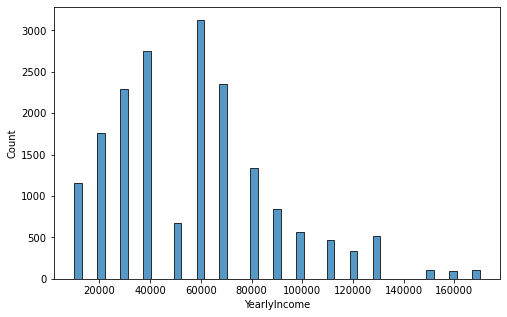

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(customer_view.YearlyIncome)
plt.show()

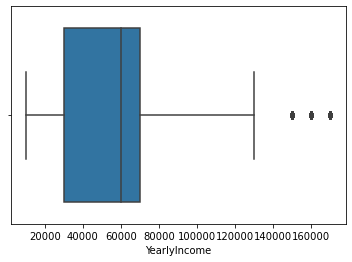

In [24]:
sns.boxplot(data=customer_view, x='YearlyIncome')
plt.show()

<p><b>The YearlyIncome data are skewed to the right and there are Outliers From Range 140000 to 170000 </b></p>

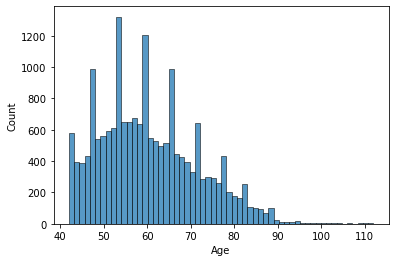

In [25]:
sns.histplot(customer_view.Age)
plt.show()

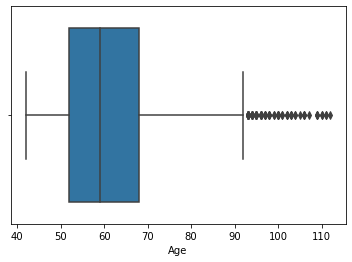

In [26]:
sns.boxplot(x='Age', data=customer_view)
plt.show()

<p><b>The Age data are skewed to the right and there are Outliers From Age 92 to 122 </b></p>

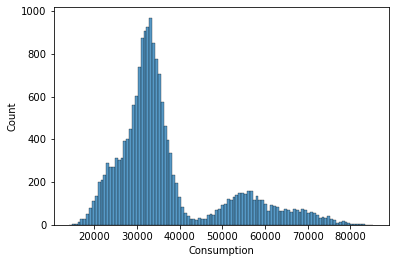

In [27]:
sns.histplot(customer_view.Consumption)
plt.show()

<b>The Majority of consumption is between 250000 and 40000 <b>

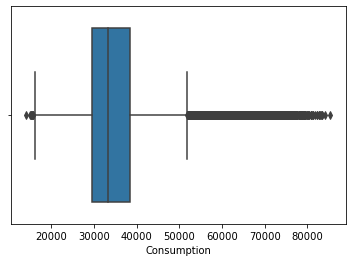

In [28]:
sns.boxplot(x='Consumption', data=customer_view)
plt.show()

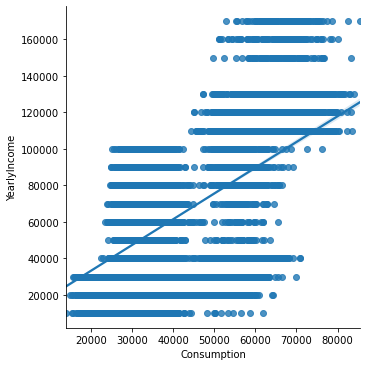

In [29]:
sns.lmplot(x='Consumption', y='YearlyIncome', data=customer_view)
plt.show()

<AxesSubplot:>

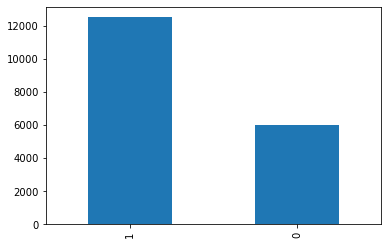

In [30]:
customer_view.HouseOwnerFlag.value_counts().plot.bar()

<AxesSubplot:>

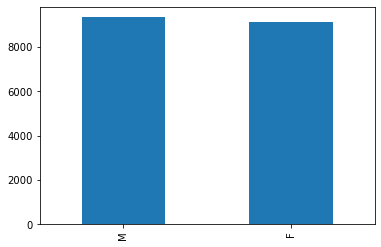

In [31]:
customer_view.Gender.value_counts().plot.bar()

<AxesSubplot:>

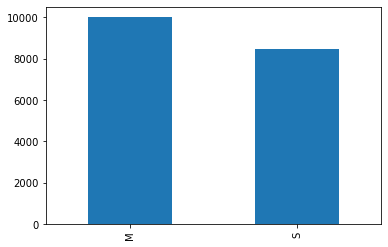

In [32]:
customer_view.MaritalStatus.value_counts().plot.bar()

In [41]:
# sales_amount_key = run_query('select sum(Amount) as Amount, CustomerKey from V_CustomerOrders group by CustomerKey')


In [42]:
# sales_amount_key.head()

In [35]:
# customer_view = pd.merge(customer_view, sales_amount_key, how='inner', on='CustomerKey')

In [43]:
# customer_view.head()

In [44]:
# customer_view.shape

In [45]:
# customer_view.CustomerKey.nunique()

In [46]:
customer_view.head()

,CustomerKey,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,HouseOwnerFlag,NumberCarsOwned,Consumption,Amount
0,4793,62,M,M,60000.0,1,0,Partial College,1,1,33756.2510,33756.2510
1,4794,57,S,F,70000.0,0,0,Bachelors,0,1,30342.1470,30342.1470
2,4795,57,M,F,80000.0,5,5,Bachelors,0,4,39773.1060,39773.1060
3,4796,57,M,F,80000.0,5,5,Bachelors,1,4,31457.9080,31457.9080
4,4810,62,M,M,70000.0,5,4,Partial College,1,3,31213.5885,31213.5885


### A. Answer Questions

In [49]:
customer_data = customer_view.copy()

#### Q1: Segmantation Analysis based on Consumption Factor

In [50]:
customer_data.groupby(['Gender'])['Consumption'].sum()

Gender
F    3.388994e+08
M    3.468543e+08
Name: Consumption, dtype: float64

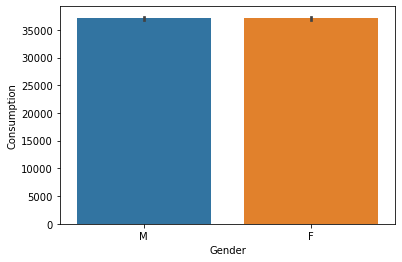

In [51]:
sns.barplot(x='Gender', y='Consumption', data=customer_data)
plt.show()

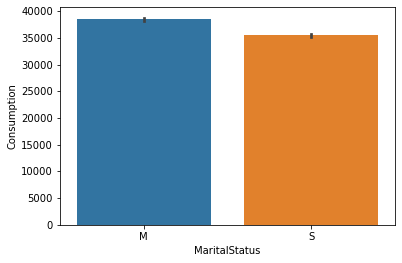

In [52]:
sns.barplot(x='MaritalStatus', y='Consumption', data=customer_data)
plt.show()

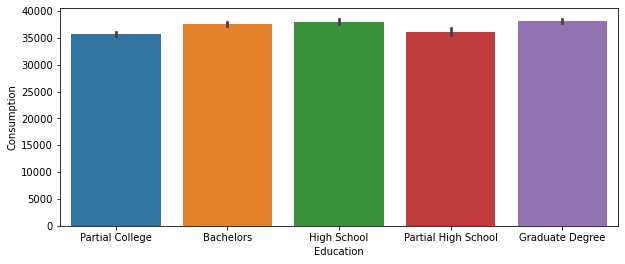

In [56]:
plt.figure(figsize=[10,4])
sns.barplot(x='Education', y='Consumption', data=customer_data)
plt.show()

In [57]:
# Convert Age to Groups data[(data['year'] >= 2005) & (data['year'] <= 2010)]

In [93]:
np.max(customer_data['Age'])

112

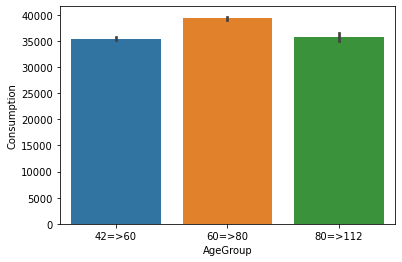

In [95]:
bins = [np.min(customer_data['Age']), 60, 80, np.max(customer_data['Age'])]
labels = ['42=>60', '60=>80', '80=>112']
customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins = bins, labels = labels, right=False)
sns.barplot(x='AgeGroup', y='Consumption', data=customer_data)
plt.show()

### Q2: Where should Contos locate their new store? 

In [97]:
region = run_query('select CustomerKey, Region from V_OnlineSalesOrder')

In [99]:
region.head()

,CustomerKey,Region
0,26,Australia
1,81,Australia
2,180,United States
3,261,United States
4,270,United States
